In [42]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [2]:
# Read the file
df_insta = pd.read_csv("/content/instagram_reach.csv")

In [3]:
df_insta.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [9]:
df_insta.shape

(100, 8)

In [4]:
#Datatype check
df_insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
#Null value check
df_insta.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

Caption is having 6 null values. It is not impacting much if we delete those

In [13]:
#Removing Null rows as it is very minimal
df_insta.dropna(axis = 0,how = 'any',inplace = True)

Looks like column "Unnamed: 0" is not required and doesn't carry any useful information so deleting that column

In [15]:
df_insta.drop("Unnamed: 0",axis=1,inplace = True)

In [16]:
df_insta.shape

(94, 7)

## Exploratory Analysis

<ipython-input-17-c6006a275d8a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insta['Followers'])


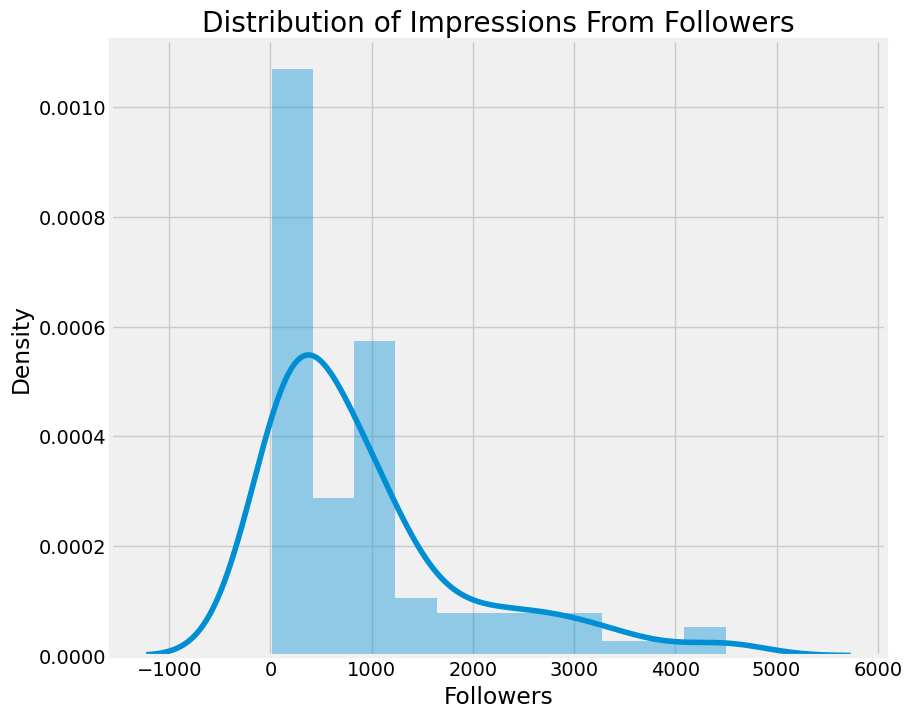

In [17]:
#Distribution of followers

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(df_insta['Followers'])
plt.show()

A skewed distribution of followers has identified

<ipython-input-18-91d22f62fa47>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insta['Likes'])


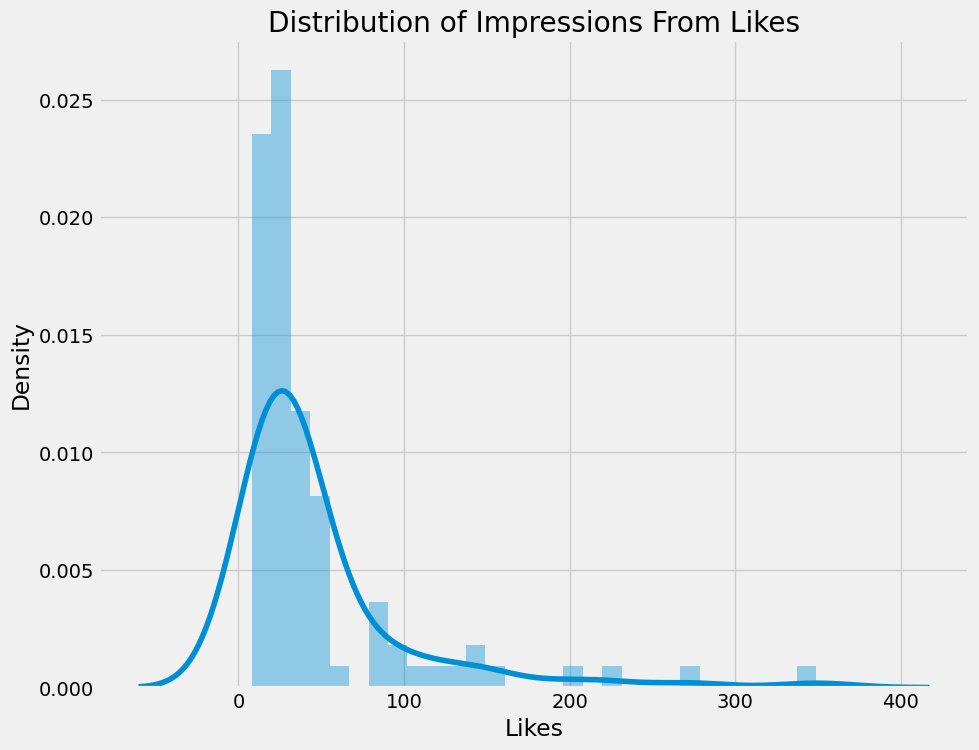

In [18]:
#Distribution of likes

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Likes")
sns.distplot(df_insta['Likes'])
plt.show()

A skewed distribution of likes identified

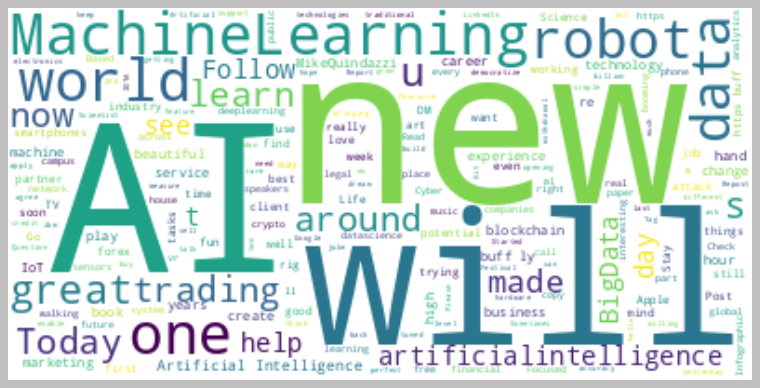

In [19]:
#Word cloud of Captions

text = " ".join(i for i in df_insta.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

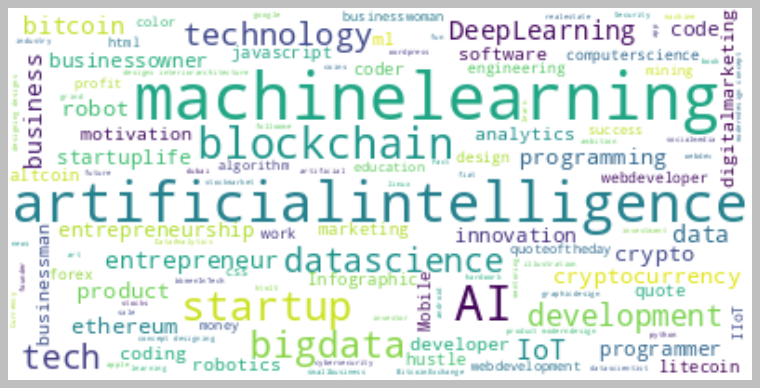

In [20]:
#Wordcloud for hashtags

text = " ".join(i for i in df_insta.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='Likes', ylabel='Followers'>

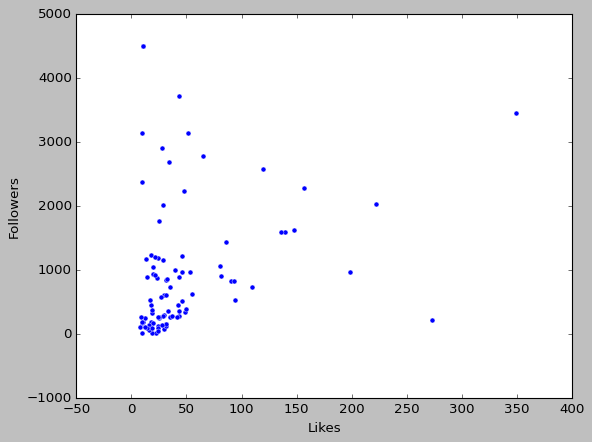

In [21]:
#Relationship between Likes and followers

sns.scatterplot(x = "Likes", y = "Followers", data = df_insta)

<Axes: xlabel='Likes', ylabel='Followers'>

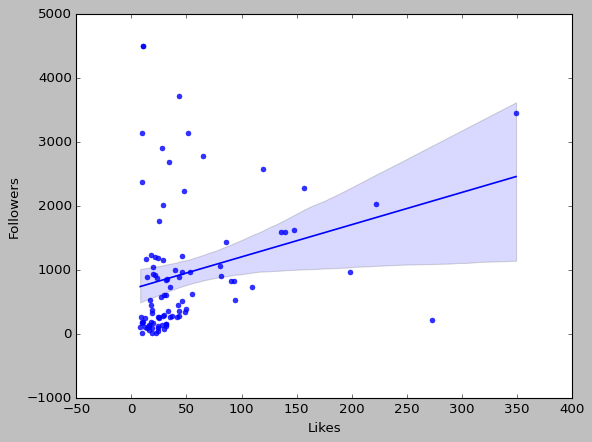

In [22]:
sns.regplot(x = "Likes", y = "Followers", data = df_insta)

In [24]:
#Look into Time since posted variable
df_insta['Time since posted'].head(20)

0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
5      3 hours
6      3 hours
7      4 hours
8      4 hours
9      7 hours
10     7 hours
11     8 hours
12     9 hours
13    11 hours
14     3 hours
15     3 hours
16     4 hours
17     4 hours
18     4 hours
19     4 hours
Name: Time since posted, dtype: object

In [26]:
# removing hours and typecasting to int
df_insta['Time since posted hours'] = df_insta['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [27]:
df_insta.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Time since posted hours
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3


In [29]:
#calculate how many likes per followers approximately

(df_insta['Likes'].sum()/df_insta['Followers'].sum())*100


5.0797341067861455

So around 5.07% of likes per followers

<Axes: xlabel='Likes', ylabel='Time since posted hours'>

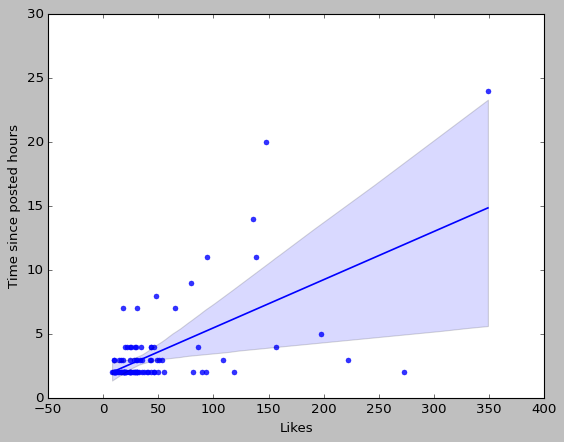

In [30]:
#Relationship between Likes and Time since posted hours

sns.regplot(x = "Likes", y = "Time since posted hours", data = df_insta)

<Axes: xlabel='Followers', ylabel='Time since posted hours'>

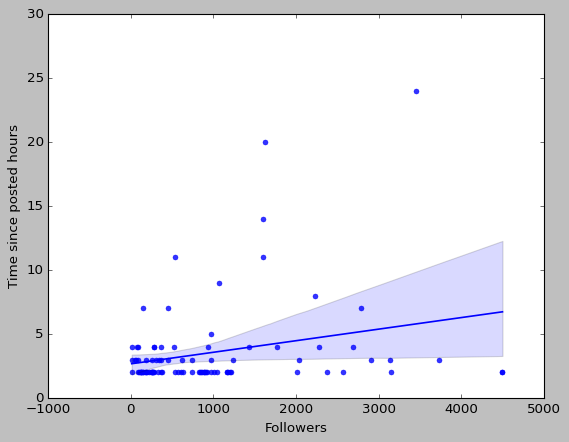

In [31]:
#Relationship between followers and time since posted hours

sns.regplot(x = "Followers", y = "Time since posted hours", data = df_insta)

In [32]:
#Model Building for Likes

featureVector = np.array(df_insta[['Followers', 'Time since posted hours']], dtype = 'float32')
targets = np.array(df_insta['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [33]:
targets = targets/maxValLikes
print(targets)

[0.3982808  0.06590258 0.07163323 0.14040114 0.08595989 0.05157593
 0.10028654 0.24641834 0.06303725 0.05157593 0.08882522 0.13753581
 0.22922637 0.26934096 0.08022922 0.15186246 0.08309455 0.13180515
 0.08595989 0.09742121 0.56733525 0.05444126 0.05730659 0.03151862
 0.0286533  0.13180515 0.07163323 0.42406878 0.12320917 0.10601719
 0.25787964 0.05444126 0.04011461 0.08595989 0.78223497 0.03724928
 0.26647565 0.06876791 0.05157593 0.38968483 0.06876791 0.02292264
 0.11747851 0.2320917  0.04584527 0.08882522 0.06876791 0.1461318
 0.12320917 0.05730659 0.07163323 0.44985673 0.06876791 0.18624642
 1.         0.0487106  0.0286533  0.06017192 0.03151862 0.04584527
 0.0286533  0.07736389 0.04584527 0.05444126 0.08309455 0.08882522
 0.05444126 0.11461318 0.06017192 0.14326647 0.0286533  0.10028654
 0.3409742  0.03151862 0.15759312 0.03438395 0.08022922 0.12320917
 0.08882522 0.04011461 0.09455588 0.12320917 0.02578797 0.08309455
 0.09169055 0.13180515 0.03438395 0.05730659 0.06876791 0.08882

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [36]:
model_likes = LinearRegression()
model_likes.fit(xTrain, yTrain)

LinearRegression()

In [37]:
# Make predictions on the testing set for likes
y_pred_likes = model_likes.predict(xTest)

In [38]:
# Evaluate the model for likes
mse_likes = mean_squared_error(yTest, y_pred_likes)
mae_likes = mean_absolute_error(yTest, y_pred_likes)
print("Likes Model Evaluation:")
print("Mean Squared Error (MSE):", mse_likes)
print("Mean Absolute Error (MAE):", mae_likes)

Likes Model Evaluation:
Mean Squared Error (MSE): 0.007866299
Mean Absolute Error (MAE): 0.06220646


In [41]:
#R square value
r2_score(yTest, y_pred_likes)

0.6095047191833267

In [43]:
#Predicting reach with XGBRegressor

#Fit the model and predict the value of test set
model_likes_XG = XGBRegressor()
model_likes_XG.fit(xTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
# Make predictions on the testing set for likes
y_pred_likes_xg = model_likes_XG.predict(xTest)

In [45]:
# Evaluate the model for likes
mse_likes_XG = mean_squared_error(yTest, y_pred_likes_xg)
mae_likes_XG = mean_absolute_error(yTest, y_pred_likes_xg)
print("Likes XGBoost Model Evaluation:")
print("Mean Squared Error (MSE):", mse_likes_XG)
print("Mean Absolute Error (MAE):", mae_likes_XG)

Likes XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.012471687
Mean Absolute Error (MAE): 0.073265165


In [46]:
#R square value
r2_score(yTest, y_pred_likes_xg)

0.3808861816983137

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

In [48]:
# Make predictions on the testing set for likes
y_pred_likes_gbr = gbr.predict(xTest)

In [49]:
# Evaluate the model for likes
mse_likes_gbr = mean_squared_error(yTest, y_pred_likes_gbr)
mae_likes_gbr = mean_absolute_error(yTest, y_pred_likes_gbr)
print("Likes Model Evaluation:")
print("Mean Squared Error (MSE):", mse_likes_gbr)
print("Mean Absolute Error (MAE):", mae_likes_gbr)

Likes Model Evaluation:
Mean Squared Error (MSE): 0.013810276721124618
Mean Absolute Error (MAE): 0.07214461580311889


In [50]:
#R square value
r2_score(yTest, y_pred_likes_gbr)

0.3144364959221031

In [71]:
#Model Building for Time since posted hours
featureVector1 = np.array(df_insta[['Followers', 'Likes']], dtype = 'float32')
targets1 = np.array(df_insta['Time since posted hours'], dtype = 'float32')
maxValtime1 = max(targets1)
print('Max value of target is {}'.format(maxValtime1))


Max value of target is 24.0


In [72]:
targets1 = targets1/maxValtime1
print(targets1)

[0.45833334 0.08333334 0.08333334 0.125      0.125      0.125
 0.125      0.16666667 0.16666667 0.29166666 0.29166666 0.33333334
 0.375      0.45833334 0.125      0.125      0.16666667 0.16666667
 0.16666667 0.16666667 0.20833333 0.08333334 0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.8333333  0.16666667 0.08333334
 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.5833333  0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334 0.125
 0.125      0.16666667 0.16666667 0.16666667 0.16666667 0.29166666
 1.         0.08333334 0.08333334 0.08333334 0.08333334 0.08333334
 0.125      0.08333334 0.125      0.08333334 0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334 0.08333334
 0.08333334 0.125      0.125      0.16666667 0.08333334 0.08333334
 0.08333334 0.08333334 0.08333334 0.08333334 0.125      0.125
 0.125    

In [73]:
x_Train, x_Test, y_Train, y_Test = train_test_split(featureVector1, targets1, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
x_Train = stdSc.fit_transform(x_Train)
x_Test = stdSc.transform(x_Test)

In [74]:
model_time = LinearRegression()
model_time.fit(x_Train, y_Train)

LinearRegression()

In [75]:
# Make predictions on the testing set for time since posted
y_pred_time = model_time.predict(x_Test)

# Evaluate the model for time since posted
mse_time = mean_squared_error(y_Test, y_pred_time)
mae_time = mean_absolute_error(y_Test, y_pred_time)
print("Time Since Posted Model Evaluation:")
print("Mean Squared Error (MSE):", mse_time)
print("Mean Absolute Error (MAE):", mae_time)

Time Since Posted Model Evaluation:
Mean Squared Error (MSE): 0.019907508
Mean Absolute Error (MAE): 0.09707895


In [76]:
#R square value
r2_score(y_Test, y_pred_time)

0.3713417774062955